In [ ]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import sympy as sp

# Laboratorio 04: Raíces

---
### Profesor: Juan Marcos Marín
### Nombre: Estefania Zapata Valderrama
*Métodos computacionales 2024-II*

---

#1
¿Para que ángulo el area del segmento circular es igual a un cuarto del area de una circunferencia?

- Muestre que la expresión que permite resolver este problema será:


\begin{equation}
\theta - \sin \theta = \frac{\pi}{2}
\end{equation}


- Construya una grafica para $\theta$  ¿Alrededor de que punto esta solución?(Para este punto se recomienda emplear `dataframe`).

- Emplee el metodo de biseccion, punto fijo,  newton y secante  para comprobar la solución intuida del apartado anterior.

---
###  Expresión

El área de un segmento circular de un círculo de radio \( r \) y ángulo central \( \theta \) (en radianes) se calcula como:

$$
A_{\text{segmento}} = \frac{r^2}{2} (\theta - \sin \theta)
$$

El área de un cuarto de la circunferencia:

$$
A_{\text{cuarto}} = \frac{1}{4} \pi r^2
$$

Igualando ambas áreas:

$$
\frac{r^2}{2} (\theta - \sin \theta) = \frac{1}{4} \pi r^2
$$

Simplificando \( r^2 \) en ambos lados:

$$
\frac{1}{2} (\theta - \sin \theta) = \frac{\pi}{4}
$$

Multiplicando ambos lados por 2:

$$
\theta - \sin \theta = \frac{\pi}{2}
$$

Por lo tanto, la expresión que permite resolver el problema es:

$$
\theta - \sin \theta = \frac{\pi}{2}
$$


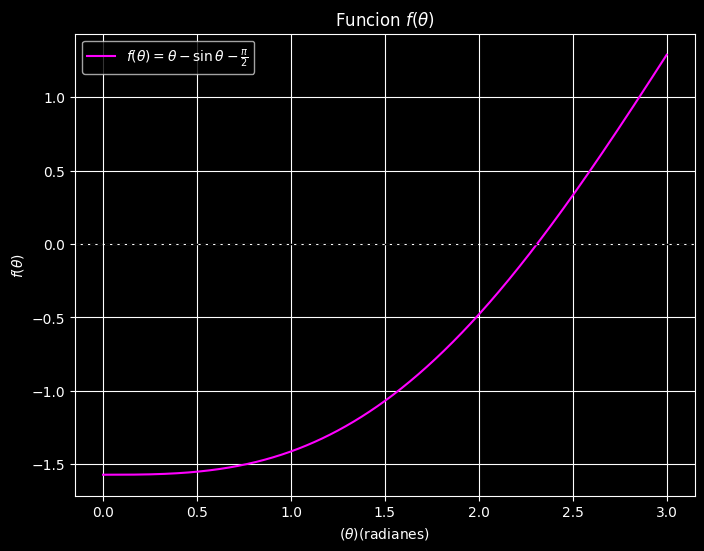

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#función
def f(theta):
    return theta - np.sin(theta) - np.pi/2

theta_values = np.linspace(0, 3, 1000)
f_values = f(theta_values)

df = pd.DataFrame({"theta": theta_values, "f(theta)": f_values})

# Grafica
plt.style.use("dark_background")
plt.figure(figsize=(8, 6))
plt.plot(df["theta"], df["f(theta)"], label=r"$f(\theta) = \theta - \sin \theta - \frac{\pi}{2}$", color="magenta")
plt.axhline(0, color='k', linestyle='--', linewidth=1)

plt.xlabel(r"$(\theta)$(radianes)")
plt.ylabel(r"$f(\theta)$")
plt.title("Funcion " r"$f(\theta)$")
plt.legend()
plt.grid()
plt.show()



Analizndo la grafica de la funcion f(theta),la funcion toca al eje X en un rango entre 2 y 2.5 radianes, en esta franja se encuentra la raiz, tendremos esto en cuenta para los valores iniciales en algunos metodos.

In [21]:
from scipy.optimize import fsolve, bisect, newton, root_scalar

def f(theta):
    return theta - np.sin(theta) - np.pi/2

sol_biseccion = bisect(f , 2 , 2.5) # Bisección
sol_newton = newton(f, 2) # Newton-Raphson
sol_puntofijo = fsolve(f,2)[0] #punto fijo con fsolve
sol_secante = root_scalar(f, x0 = 2,method = 'secant') # Secante

print(f'Raiz por el método de Bisección: {sol_biseccion}')
print(f'Raiz por el método de Newton-Raphson: {sol_newton}')
print(f'Raiz por el método de fsolve(punto fijo):  {sol_puntofijo}')
print(f'Raiz por el método de la secante:{sol_secante}')

Raiz por el método de Bisección: 2.309881460010729
Raiz por el método de Newton-Raphson: 2.309881460010033
Raiz por el método de fsolve(punto fijo):  2.309881460010033
Raiz por el método de la secante:      converged: True
           flag: converged
 function_calls: 6
     iterations: 5
           root: 2.309881460010033
         method: secant


Al utilizar estos cuatro metodos vemos que la raiz de esta funcion es en 2.31 radianes aproximadamente, esto concuerda con lo analizado de la grafica anterior.

# 2

La ecuación de Kepler juega un papel importante en la mecánica celeste, ya que permite el calculo de la posición angular de objetos orbitantes. Para todas las órbitas elipticas, la ecuación

$$M = E- e\sin(E)$$

siendo $M$ la anomalía media, $E$ la anomalía excéntrica y $e$ la excentricidad ($e= \sqrt{1-b/a}$) (con $a>b$ los semiejes). Los astrónomos definen las "anomalías"  como posiciones angulares: la anomalía media $M$ es la posición angular del objeto en una órbita circular ficticia y, suponiendo una velocidad angular constante, puede relacionarse con el lapso de tiempo transcurrido desde el paso por el perihelio

$$M= \frac{2\pi}{T} (t-t_0)$$

donde $T$ es el periodo orbital y $t_0$ el tiempo cuando el objeto está en el perihelio.

Para el cometa Halley $e=0.9672671$, $T=75.96000$ años y $t_0=1986.1113$ años (Febrero 9 de 1986).

* Encuentre $E$ para el cometa Halley el 1 de abril de 1986. Para esto, haga una gráfica de

$$f(E) = E - e\sin(E) - M$$

para $E\in [0,1]$.

* Grafique $E=E(t)$ para todo un periodo de revolución y resuelva usando el método de Newton y secante

$$E-e\sin(E) - M(t) = 0$$

con un paso de $\Delta t = T/100$. $t_i = t_0 + (i)*\Delta t$, comenzando en $E(t_0) = 0$


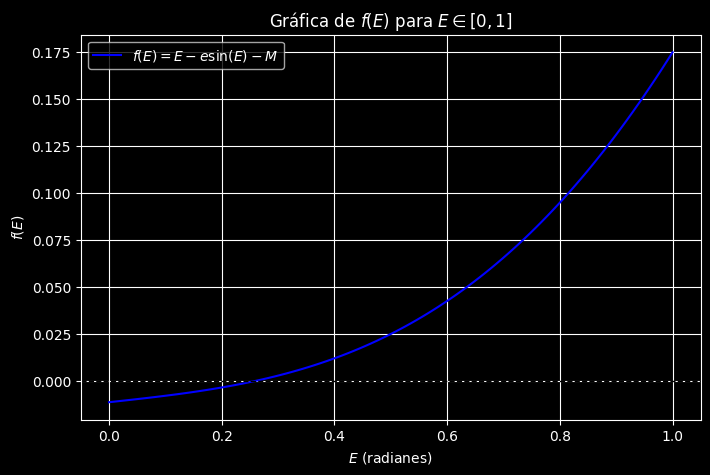

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton, root_scalar

# Datos del cometa Halley
e = 0.9672671
T = 75.96
t0 = 1986.1113

# Anomalía media M
M = lambda t: (2 * np.pi / T) * (t - t0)

#1 de abril de 1986
t_april = 1986 + (31+28+31+1) / 365  # la fecha debe estar en años
M_april = M(t_april)

# La Ecuacion de Kepler queda:
f = lambda E, M_val: E - e * np.sin(E) - M_val

# f(E) para E en [0,1]
E_vals = np.linspace(0, 1, 100)
f_vals = [f(E, M_april) for E in E_vals]

plt.style.use("dark_background")
plt.figure(figsize=(8, 5))
plt.plot(E_vals, f_vals, label=r'$f(E) = E - e\sin(E) - M$', color='blue')
plt.axhline(0, color='k', linestyle='--', linewidth=1)
plt.xlabel(r'$E$ (radianes)')
plt.ylabel(r'$f(E)$')
plt.title('Gráfica de $f(E)$ para $E \in [0,1]$')
plt.legend()
plt.grid()
plt.show()




Valor de E (Newton): 0.261250
Valor de E (Secante): 0.261250


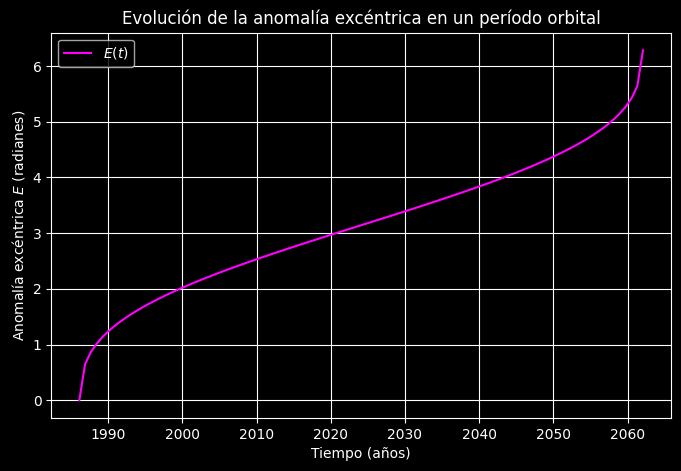

In [23]:
# E con Newton y Secante
E_newton = newton(f, 0.5, args=(M_april,))
E_secante = root_scalar(f, args=(M_april,), x0=0.5, x1=1.0, method='secant').root

print(f'Valor de E (Newton): {E_newton:.6f}')
print(f'Valor de E (Secante): {E_secante:.6f}')

# Calcular E(t) para un periodo orbital completo
t_values = np.linspace(t0, t0 + T, 100)
M_values = M(t_values)
E_values = [newton(f, 0.5, args=(M_val,)) for M_val in M_values]

plt.style.use("dark_background")
plt.figure(figsize=(8, 5))
plt.plot(t_values, E_values, label='$E(t)$', color='magenta')
plt.xlabel('Tiempo (años)')
plt.ylabel('Anomalía excéntrica $E$ (radianes)')
plt.title('Evolución de la anomalía excéntrica en un período orbital')
plt.legend()
plt.grid()
plt.show()

#3
En la teoria de campo medio, la magnetización como función de la temperatura de un material magnético puede ser calculada como:

\begin{equation}
m(T) = \tanh\left( \frac{m(T)}{T} \right)
\end{equation}

donde $m$ y $T$ son la magnetizacion y temperatura reducida respectivamente


Para $T = 0.5$, determine:

* La magnetización reducida empleando el metodo de la secante y Newton-Raphson(Muestre su resultado con 4 cifras)

* Valide su respuestado con el metodo de punto fijo.
(Muestre su resultado con 4 cifras)

Ahora, defina `T = np.linspace(0.1,0.99,100)`, y emple el metodo de la secante para construir un gráfico de magnetización reducida como función de la temperatura para los  100 valores  de T.

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton, root_scalar, fixed_point

def f(m, T):
    return m - np.tanh(m / T)

def df(m, T):
    return 1 - (1 / T) * (1 / np.cosh(m / T))**2

T_fixed = 0.5
m_newton = newton(f, x0=1.0, fprime=df, args=(T_fixed,)) #usando Newton
sol_secante = root_scalar(f, x0=1.0, x1=0.5, args=(T_fixed,), method='secant') #usando secante
m_secante = sol_secante.root
m_fsolve = fsolve(f, x0=1.0, args=(T_fixed)) #usando punto fijo

print(f"Método de Newton-Raphson: m ≈ {m_newton:.4f}")
print(f"Método de la Secante: m ≈ {m_secante:.4f}")
print(f"Solución usando fsolve: m ≈ {m_fsolve[0]:.4f}")




Método de Newton-Raphson: m ≈ 0.9575
Método de la Secante: m ≈ 0.9575
Solución usando fsolve: m = 0.9575


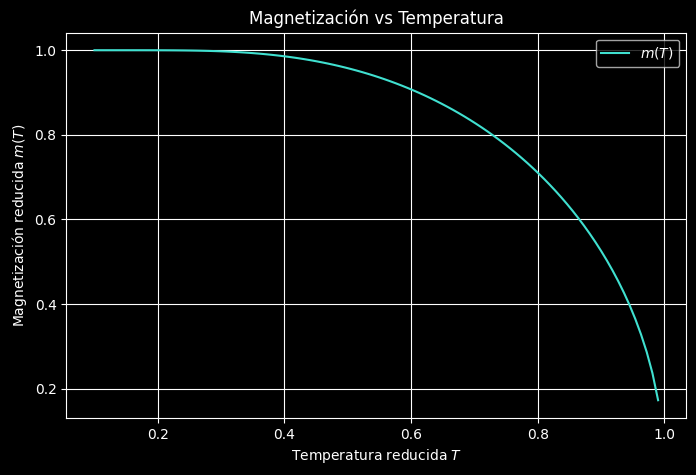

In [29]:
# Curva m(T) usando el método de la Secante
T_vals = np.linspace(0.1, 0.99, 100)
m_vals = []

for T in T_vals:
    sol = root_scalar(f, x0=1.0, x1=0.5, args=(T,), method='secant')
    m_vals.append(sol.root)

# Grafica m(T)
plt.style.use("dark_background")
plt.figure(figsize=(8, 5))
plt.plot(T_vals, m_vals, label=r'$m(T)$', color='turquoise')
plt.xlabel('Temperatura reducida $T$')
plt.ylabel('Magnetización reducida $m(T)$')
plt.title('Magnetización vs Temperatura')
plt.legend()
plt.grid()
plt.show()